In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import librosa
import whisper

plt.rcParams.update({'font.size': 14})
plt.rcParams['text.usetex'] = False

In [55]:
SAMPLE_RATE = 16000

# Define your parameter ranges
n_ffts = [256, 512, 1024, 2048]
hop_lengths = [32, 64, 128, 256]
ns_mels = [64, 80, 128, 160]

audio = whisper.load_audio('audio/audio.m4a', sr=SAMPLE_RATE)

In [56]:
def spectrogram(n_fft, hop_length, fig, ax, i, j, vmin, vmax, n_mels_arg):
    mels = librosa.feature.melspectrogram(
        y=audio,
        sr=SAMPLE_RATE,
        n_fft=n_fft,
        hop_length=hop_length,
        n_mels=n_mels_arg
    )
    mels_db = librosa.power_to_db(mels, ref=np.max)
    
    # Plot without individual colorbars
    sns.heatmap(mels_db, ax=ax, cmap='viridis', cbar=False, vmin=vmin, vmax=vmax)
    
    # Add subplot title
    ax.set_title(r'$n_\text{fft}=$'+str(n_fft)+r', $\ell_h='+str(hop_length)+r'$', fontsize=20)

    
    # X-axis (time) - only on bottom row
    if i == len(n_ffts) - 1:
        duration = len(audio) / SAMPLE_RATE
        num_frames = mels_db.shape[1]
        time_ticks = np.linspace(0, num_frames, num=6)
        time_labels = [f'{duration * (tick/num_frames):.1f}' for tick in time_ticks]
        ax.set_xticks(time_ticks)
        ax.set_xticklabels(time_labels)
        ax.set_xlabel('Time (s)', fontsize=20)
    else:
        ax.set_xticks([])
        ax.set_xticklabels([])
        ax.set_xlabel('')
    
    # Y-axis (frequency) - only on left column
    if j == 0:
        n_mels = mels_db.shape[0]
        mel_ticks = np.linspace(0, n_mels, num=5)
        ax.set_yticks(mel_ticks)
        ax.set_yticklabels([f'{int(tick)}' for tick in mel_ticks])
        ax.set_ylabel('Mel Bin', fontsize=20)
    else:
        ax.set_yticks([])
        ax.set_yticklabels([])
        ax.set_ylabel('')
    
    return mels_db

/var/folders/54/ctkh4lg97kd4x1fv3qzrpd3c0000gp/T/ipykernel_3393/3319773630.py:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.92, 0.98])
/var/folders/54/ctkh4lg97kd4x1fv3qzrpd3c0000gp/T/ipykernel_3393/3319773630.py:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.92, 0.98])
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/librosa/feature/spectral.py:2148: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/librosa/feature/spectral.py:2148: UserWarning: Empty filters detected in mel frequency basis. Some chan

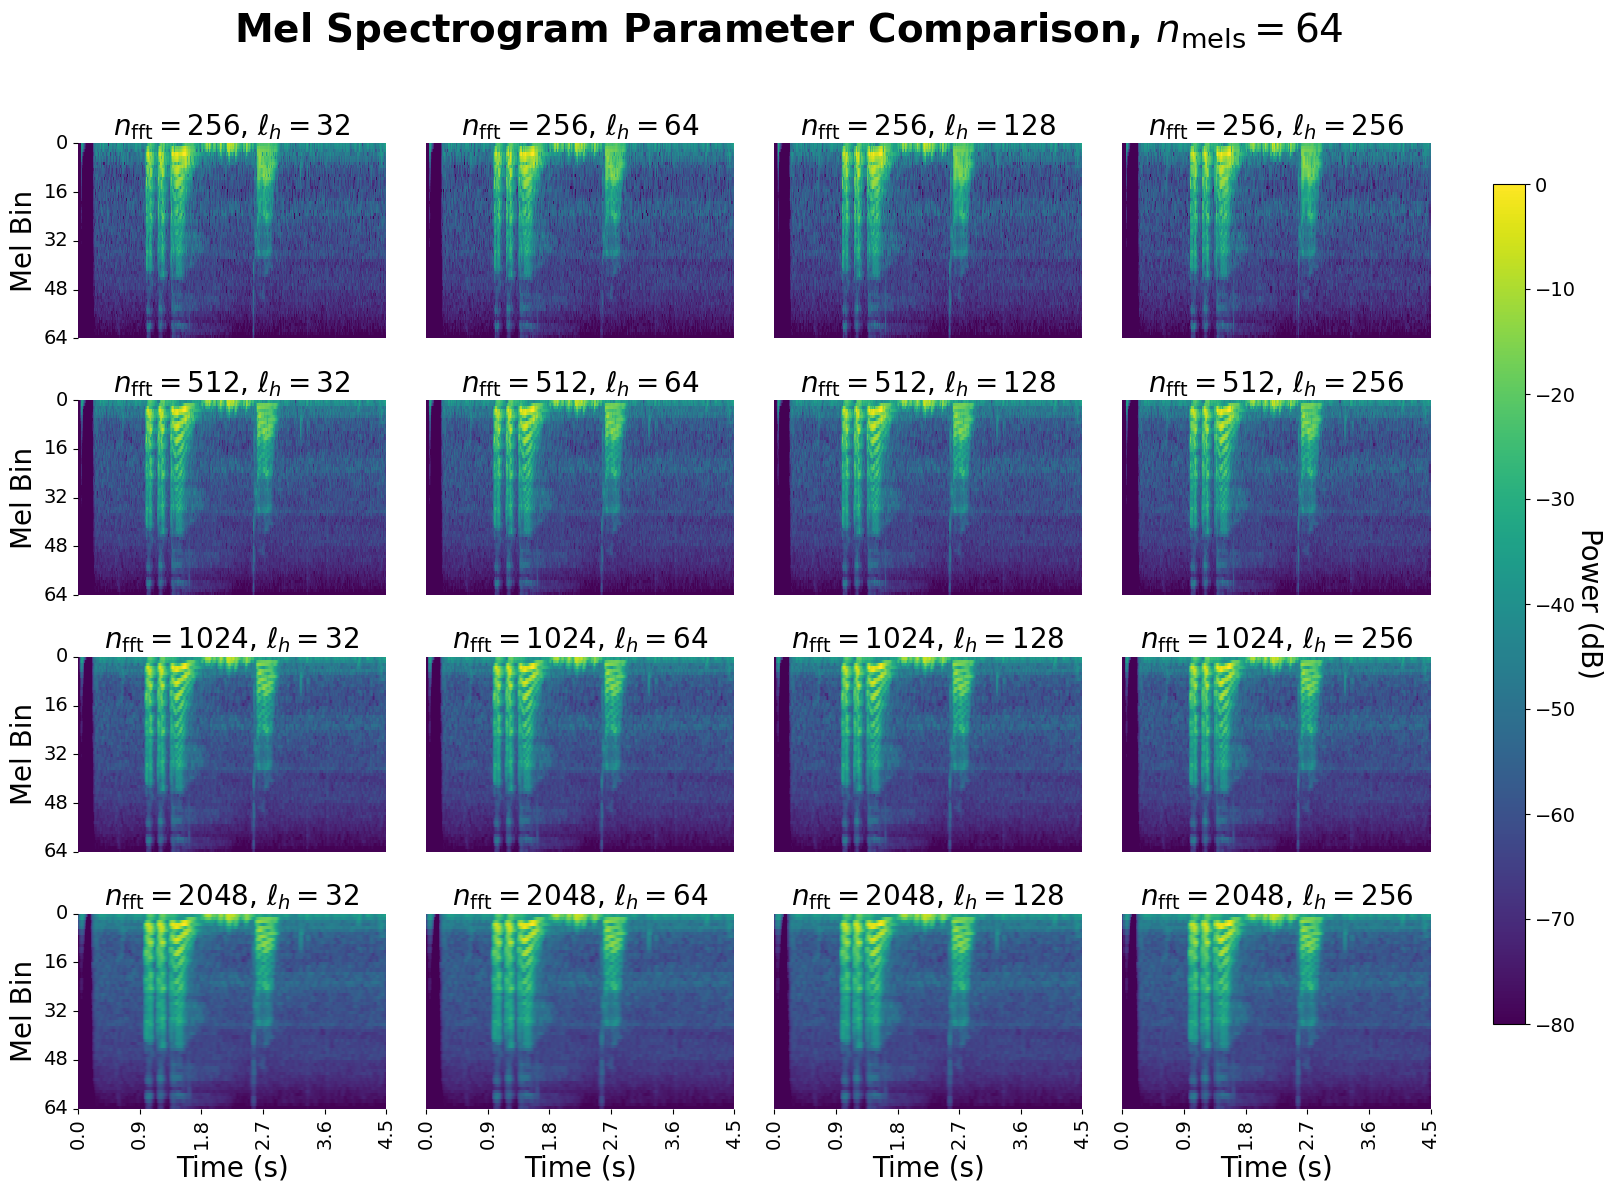

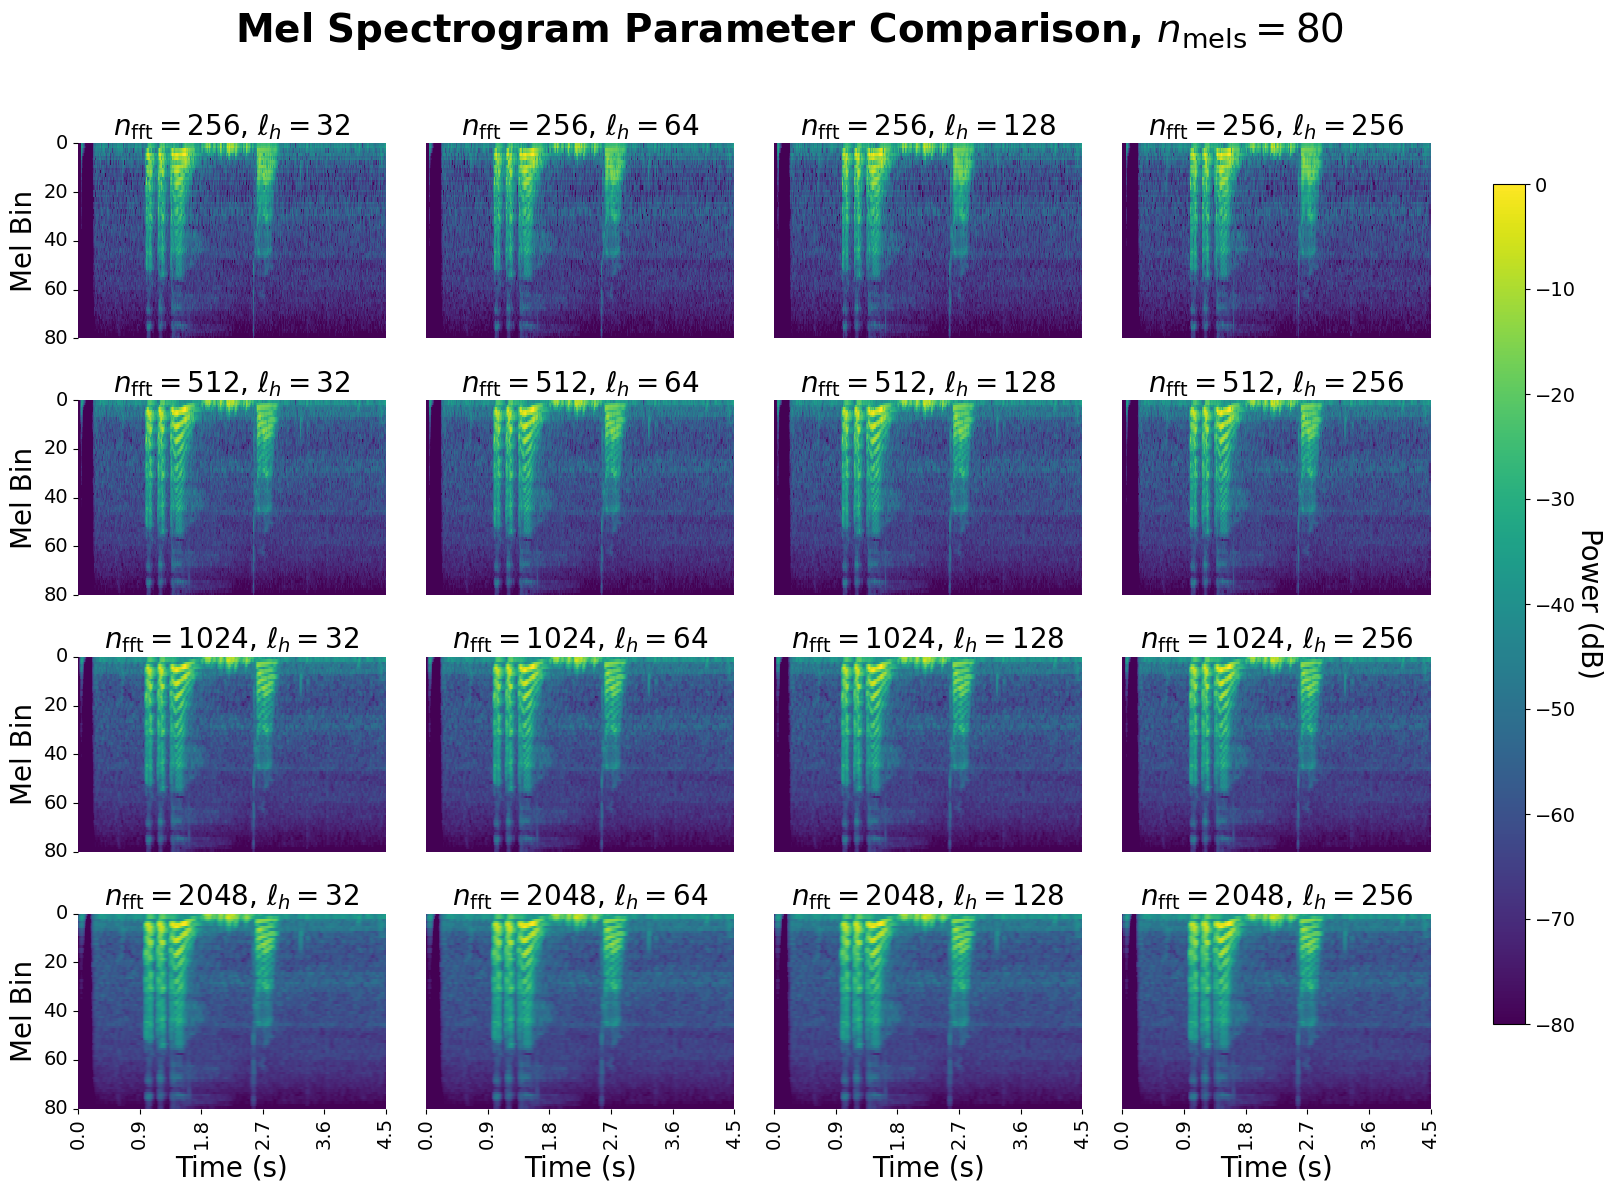

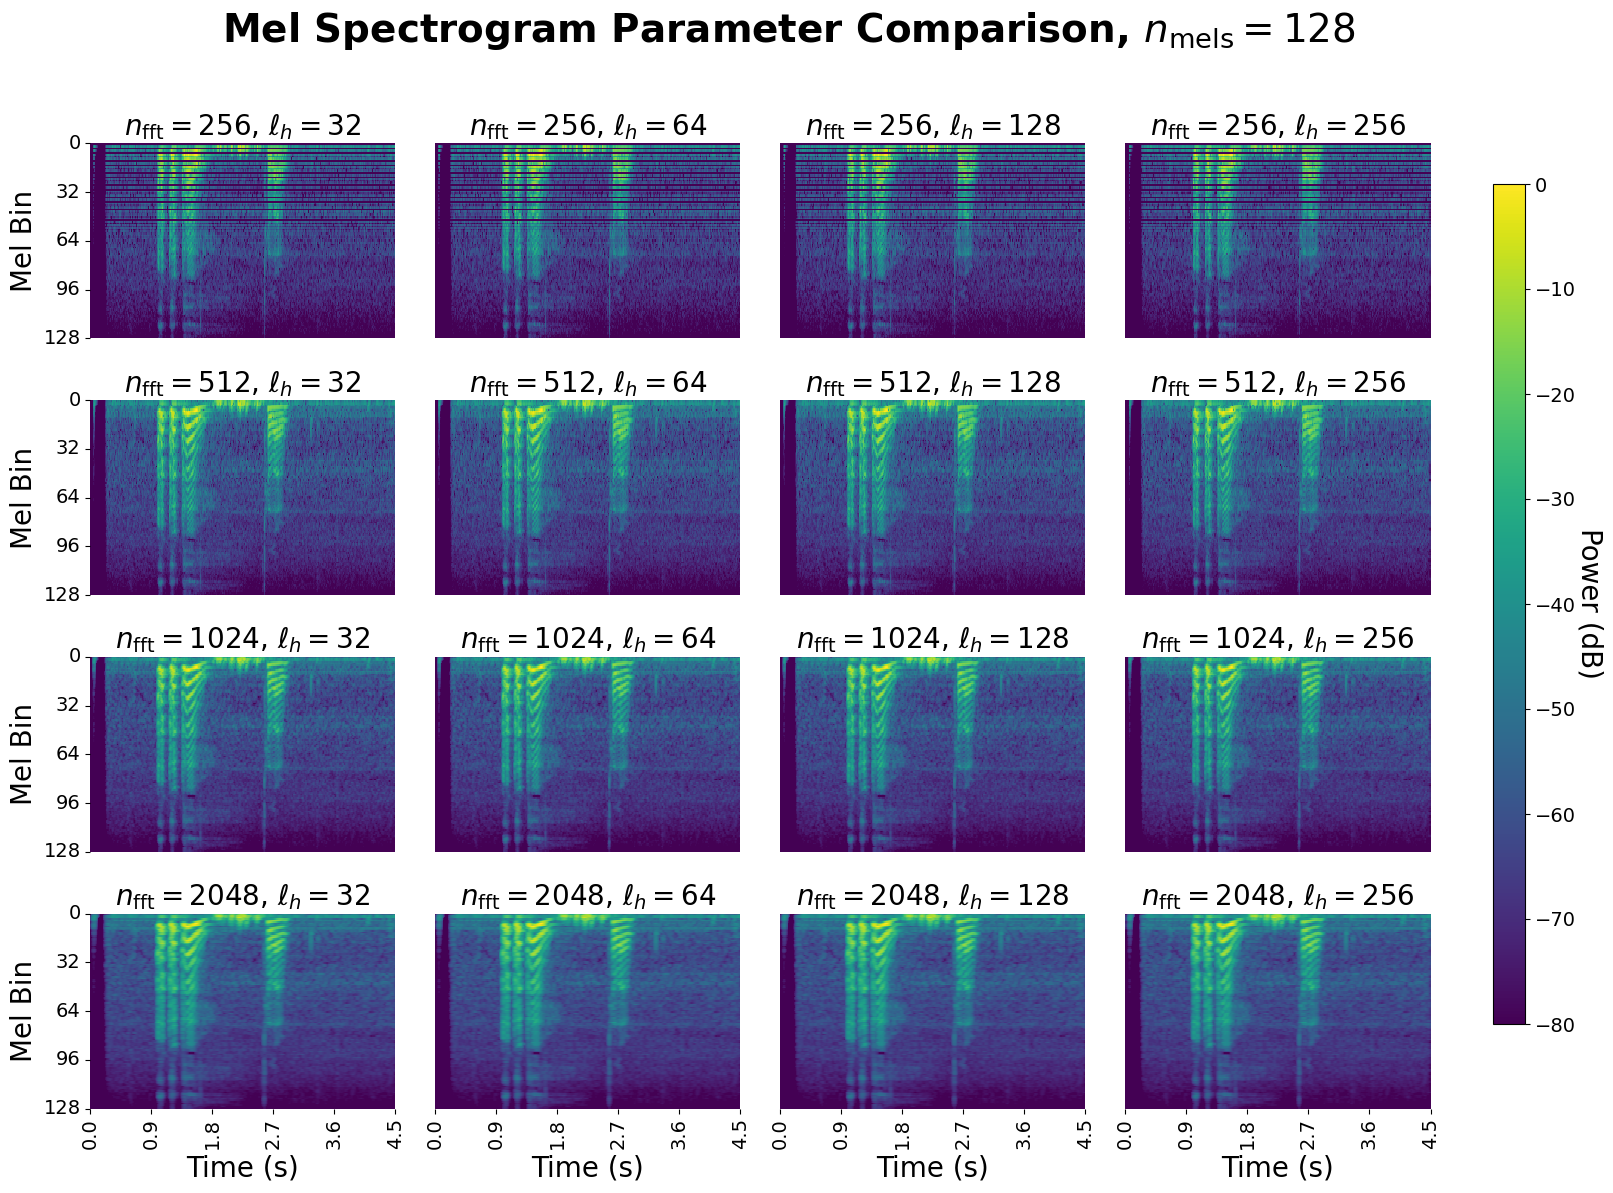

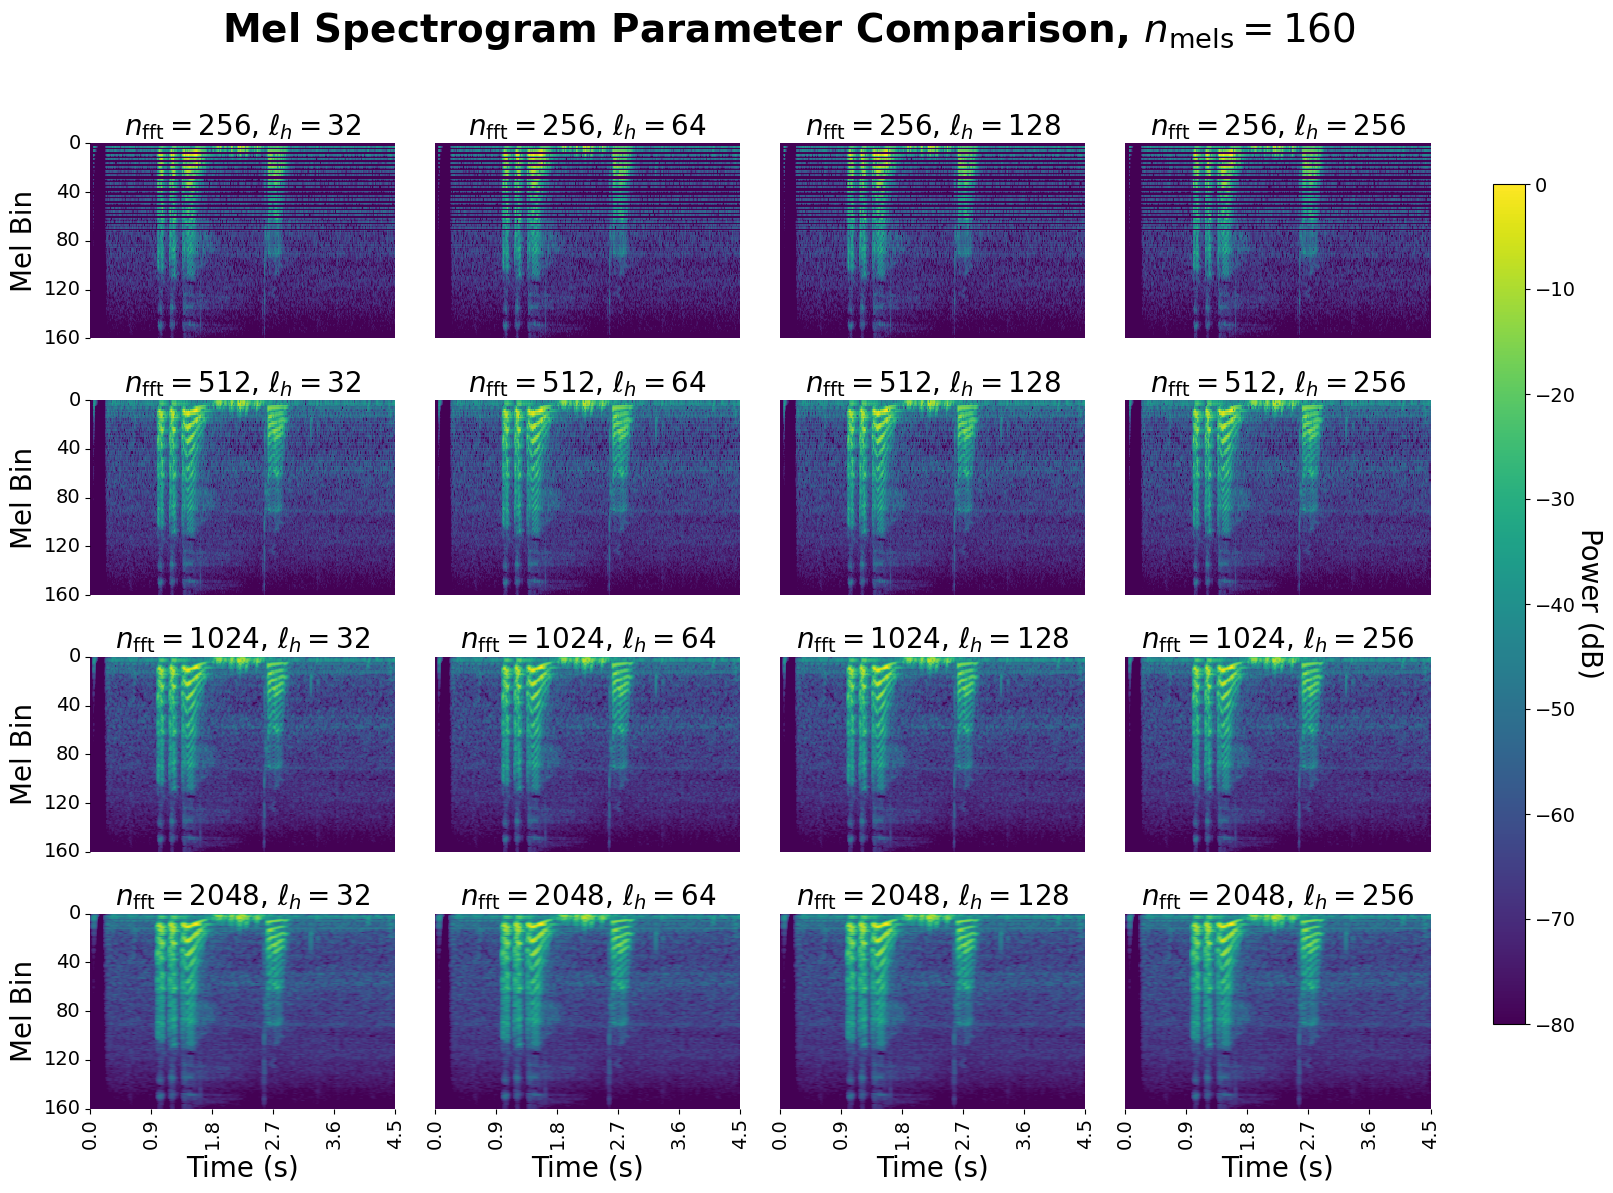

In [57]:
# Generated by Claude
for num_mels in ns_mels:
    # Calculate figure size based on grid dimensions
    fig_width = 4 * len(hop_lengths)
    fig_height = 3 * len(n_ffts)
    fig, axs = plt.subplots(
        len(n_ffts),
        len(hop_lengths),
        figsize=(fig_width, fig_height)
    )

    # First pass: compute all spectrograms to find global min/max for shared colorbar
    all_mels_db = []
    for i in range(len(n_ffts)):
        for j in range(len(hop_lengths)):
            audio = whisper.load_audio('audio/audio.m4a', sr=SAMPLE_RATE)
            mels = librosa.feature.melspectrogram(
                y=audio,
                sr=SAMPLE_RATE,
                n_fft=n_ffts[i],
                hop_length=hop_lengths[j],
                n_mels=num_mels
            )
            mels_db = librosa.power_to_db(mels, ref=np.max)
            all_mels_db.append(mels_db)

    vmin = min(m.min() for m in all_mels_db)
    vmax = max(m.max() for m in all_mels_db)

    # Second pass: plot with shared colorbar scale
    for i in range(len(n_ffts)):
        for j in range(len(hop_lengths)):
            spectrogram(n_ffts[i], hop_lengths[j], fig, axs[i, j], i, j, vmin, vmax, num_mels)

    # Add overall title
    fig.suptitle(r'Mel Spectrogram Parameter Comparison, $n_\text{mels}='+str(num_mels)+r'$', fontsize=28, fontweight='bold', y=0.995)

    # Add shared colorbar
    fig.subplots_adjust(right=0.92)
    cbar_ax = fig.add_axes([0.94, 0.15, 0.02, 0.7])
    norm = plt.Normalize(vmin=vmin, vmax=vmax)
    sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
    sm.set_array([])
    cbar = fig.colorbar(sm, cax=cbar_ax)
    cbar.set_label('Power (dB)', rotation=270, labelpad=20, fontsize=20)

    plt.tight_layout(rect=[0, 0, 0.92, 0.98])
    
    plt.savefig(f'figs/mels_{num_mels}.png', dpi=300, bbox_inches='tight')

/var/folders/54/ctkh4lg97kd4x1fv3qzrpd3c0000gp/T/ipykernel_3393/3007610399.py:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.92, 0.98])


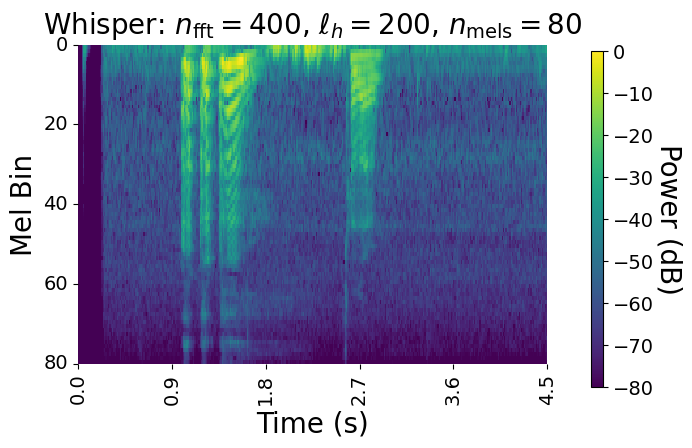

In [58]:
fig, ax = plt.subplots(1, 1)

audio = whisper.load_audio('audio/audio.m4a', sr=SAMPLE_RATE)
mels = librosa.feature.melspectrogram(
    y=audio,
    sr=SAMPLE_RATE,
    n_fft=400,
    hop_length=200,
    n_mels=80
)
mels_db = librosa.power_to_db(mels, ref=np.max)

# Plot without individual colorbars
sns.heatmap(mels_db, ax=ax, cmap='viridis', vmin=vmin, vmax=vmax, cbar=False)

# Add subplot title
ax.set_title(r'Whisper: $n_\text{fft}=400$, $\ell_h=200$, $n_\text{mels}=80$', fontsize=20, pad=8)

duration = len(audio) / SAMPLE_RATE
num_frames = mels_db.shape[1]
time_ticks = np.linspace(0, num_frames, num=6)
time_labels = [f'{duration * (tick/num_frames):.1f}' for tick in time_ticks]
ax.set_xticks(time_ticks)
ax.set_xticklabels(time_labels)
ax.set_xlabel('Time (s)', fontsize=20)

n_mels = mels_db.shape[0]
mel_ticks = np.linspace(0, n_mels, num=5)
ax.set_yticks(mel_ticks)
ax.set_yticklabels([f'{int(tick)}' for tick in mel_ticks])
ax.set_ylabel('Mel Bin', fontsize=20)

fig.subplots_adjust(right=0.92)
cbar_ax = fig.add_axes([0.94, 0.15, 0.02, 0.7])
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label('Power (dB)', rotation=270, labelpad=20, fontsize=20)

plt.tight_layout(rect=[0, 0, 0.92, 0.98])
plt.savefig(f'figs/whisper.png', dpi=300, bbox_inches='tight')